# Rejection Sampling Implementation

Start with a function that can plot all distributions using a decorator.
There is an example target distribution function that is continuous.
There is a function that runs the rejection sampling and returns the x and y, and all the corresponding values of them being accepted or rejected.
This notebook was completed several years ago.


In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from typing import Callable

# parent function to plot everything that rejection_sampling does
def plot_dist(callback_func):
    def inner(*args, **kwargs):
        target_func = args[0]

        # use arguments and the multi arguments
        samples = callback_func(*args, **kwargs)

        # separate into accepted and rejected samples
        accepted_samples = samples[samples.accepted == True]
        rejected_samples = samples[samples.accepted == False]
        
        accepted_color = 'lightseagreen'
        rejected_color = 'firebrick'
        
        x_s = np.linspace(samples.x.min(), samples.x.max(), 1000)
        y_s = target_func(x_s)

        # clear
        plt.clf()
        
        # regular scatter plot with boundary line
        plt.plot(x_s, y_s, label='Original Function') 
        plt.fill_between(x_s, y_s, 0, alpha=0.4)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.title(f'{target_func.__name__}(x)')

        plt.scatter(accepted_samples.x, accepted_samples.y, c=accepted_color, alpha=0.5)
        plt.scatter(rejected_samples.x, rejected_samples.y, c=rejected_color, alpha=0.5)
        plt.show()

        # histogram with boundary line
        plt.plot(x_s, y_s, label='Original Function') 
        plt.hist(accepted_samples.x, 
                 bins=20, 
                 color=accepted_color, 
                 stacked=True, 
                 histtype='barstacked', 
                 density=True, 
                 alpha=0.4, 
                 label='Accepted Dist.')
        plt.xlabel('x')
        plt.ylabel('f(x)')
        plt.legend()
        plt.title(f'{target_func.__name__}(x)')
        plt.show()

        return samples
 
    return inner

# define a target pdf
def my_target_distribution(x):
    return np.exp((-x ** 2) / 2) / math.sqrt(2 * np.pi)

# rejection sampling
@plot_dist
def rejection_sampling(target_dist: Callable[[float], float], M = 1.1, size=1000, bounds=(-5, 5), new_dist_q : Callable[[float], float] = lambda x: 1):
    min_x, max_x = bounds

    x = np.random.uniform(low=min_x, high=max_x, size=size)
    y = np.random.uniform(low=0, high=M * new_dist_q(x), size=size)

    # accept or reject
    is_accepted = y < target_dist(x)

    samples = pd.DataFrame({
        'x': x,
        'y': y,
        'accepted': is_accepted
    })
    
    return samples

# Examples

Gamma, Normal, Uniform, and a testing distribution are used for rejection sampling.


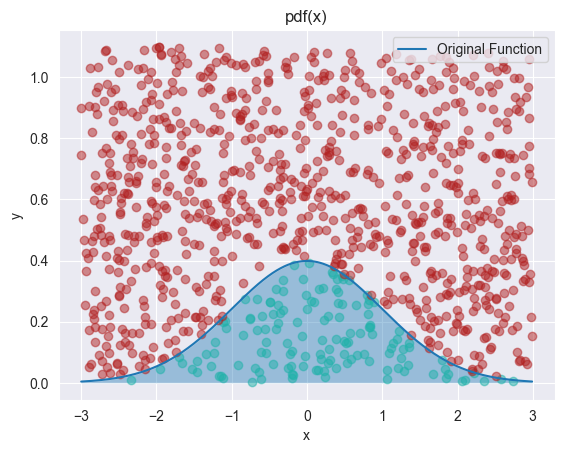

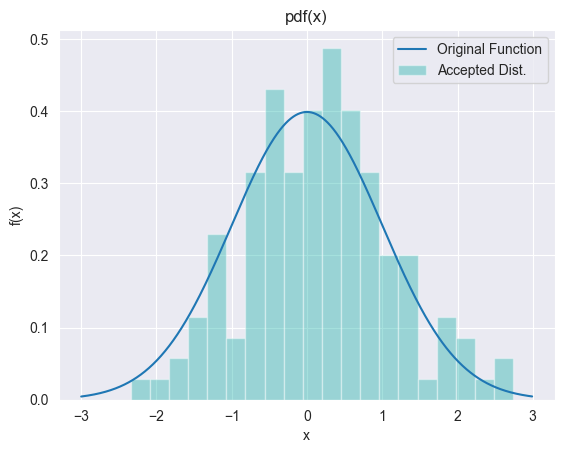

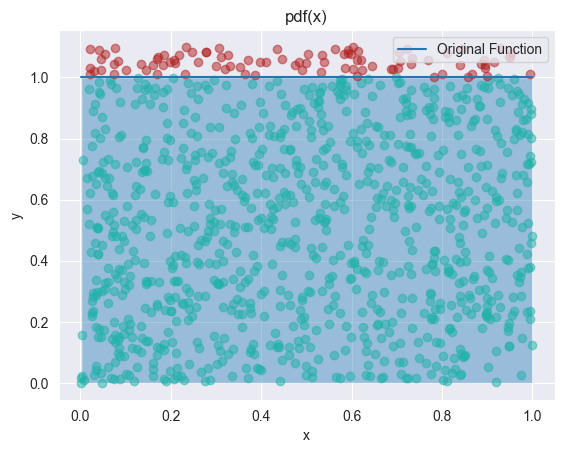

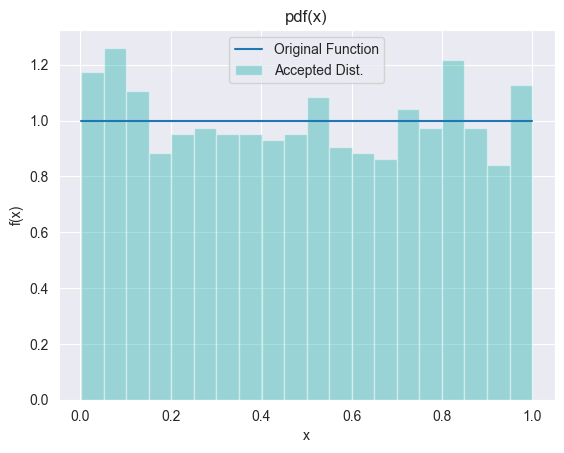

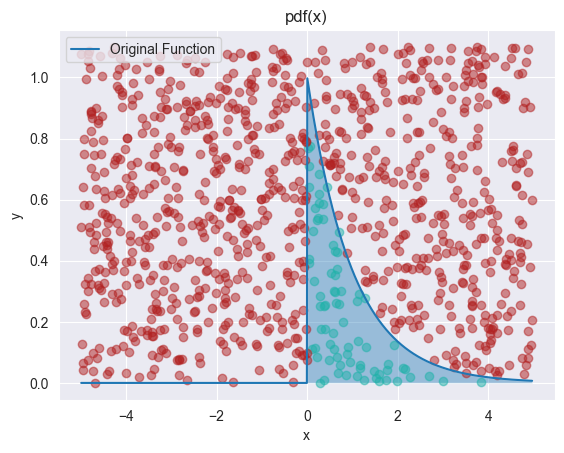

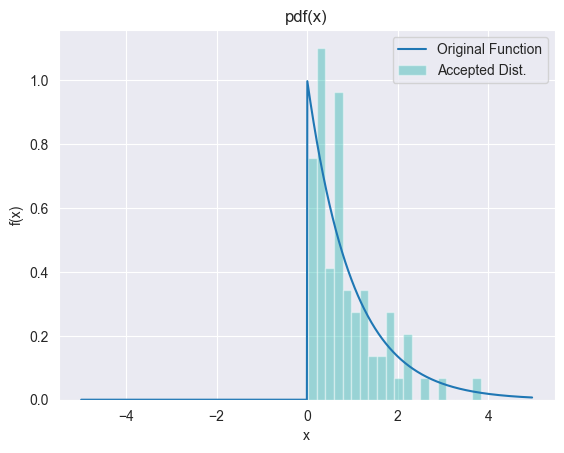

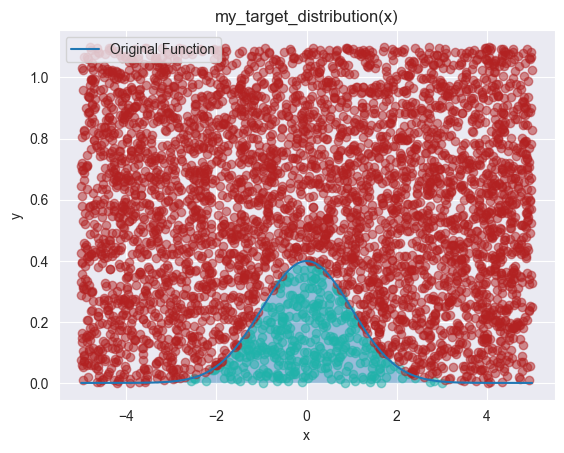

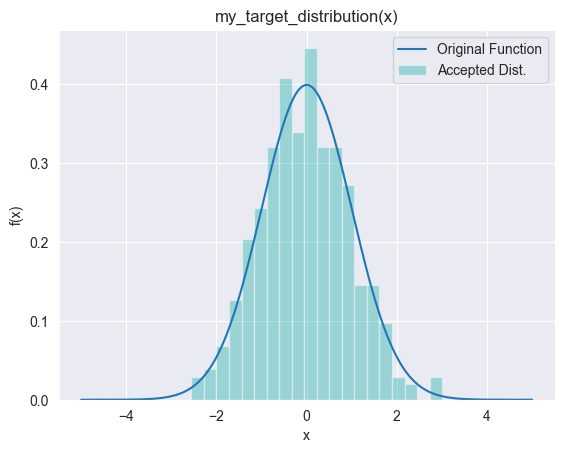

,x,y,accepted
0,1.363542,0.258616,False
1,-1.215876,0.133323,True
2,2.784684,0.187149,False
3,2.142633,0.597362,False
4,1.417096,0.791555,False
...,...,...,...
995,0.840096,0.190733,True
996,-0.772784,0.477006,False
997,-1.312835,0.969347,False
998,1.990264,0.237973,False


,x,y,accepted
0,0.025709,0.775488,True
1,0.733999,0.178548,True
2,0.861911,0.277893,True
3,0.834220,0.937407,True
4,0.096408,0.087919,True
...,...,...,...
995,0.443129,0.946250,True
996,0.435785,0.117000,True
997,0.996146,0.896378,True
998,0.731662,1.042650,False


,x,y,accepted
0,0.068702,0.774346,True
1,-2.077648,0.760715,False
2,0.997086,0.541480,False
3,1.188034,0.885284,False
4,4.858884,0.455386,False
...,...,...,...
995,-2.061736,0.694407,False
996,-3.432270,0.154784,False
997,-1.433109,0.124074,False
998,-0.284371,0.604321,False


,x,y,accepted
0,-0.747820,0.020437,True
1,-1.601852,0.456959,False
2,-0.001068,0.507541,False
3,4.916721,0.532720,False
4,-1.295077,1.027103,False
...,...,...,...
4395,1.153237,0.313602,False
4396,2.372006,0.886311,False
4397,-3.283067,0.294641,False
4398,2.379633,0.818892,False


In [4]:
from scipy.stats import gamma, norm, uniform
from IPython.display import display

norm_rs = rejection_sampling(norm.pdf, bounds=(-3,3))
uniform_rs = rejection_sampling(uniform.pdf, bounds=(0, 1))
gamma_rs = rejection_sampling(gamma(1).pdf, bounds=(-5,5))
target_rs = rejection_sampling(my_target_distribution, size=4400)

display(norm_rs, uniform_rs, gamma_rs, target_rs)